In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import pandas as pd

In [3]:
import pathlib
dataframe = pd.read_csv('SEER8 Raw Data.csv')
dataframe.head()

,Sex,Year of diagnosis,Primary Site - labeled,Grade Recode (thru 2017),"ICD-O-3 Hist/behav, malignant",Age recode with <1 year olds and 90+,Year of death recode,Months from diagnosis to treatment,Survival months
0,Female,2020,C25.0-Head of pancreas,Unknown,"8140/3: Adenocarcinoma, NOS",80-84 years,Alive at last contact,0,2
1,Female,2020,C25.8-Overlapping lesion of pancreas,Unknown,"8140/3: Adenocarcinoma, NOS",75-79 years,Alive at last contact,1,0
2,Female,2020,C25.8-Overlapping lesion of pancreas,Unknown,"8140/3: Adenocarcinoma, NOS",75-79 years,2020,2,10
3,Female,2020,C25.0-Head of pancreas,Unknown,"8140/3: Adenocarcinoma, NOS",90+ years,2020,1,2
4,Female,2020,C25.1-Body of pancreas,Unknown,"8500/3: Infiltrating duct carcinoma, NOS",65-69 years,Alive at last contact,1,9


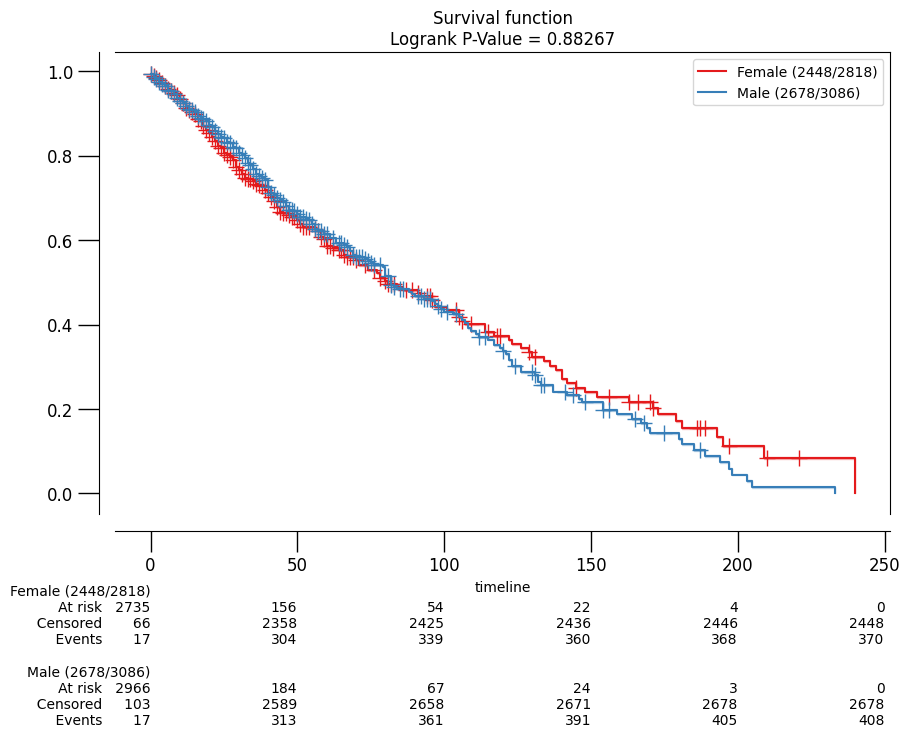

In [4]:
# create Kaplan-Meier plot
import kaplanmeier as km

survivalDataFrame = dataframe.copy()
survivalDataFrame["Died"] = survivalDataFrame["Year of death recode"] == "Alive at last contact"

survivalDataFrame.head()

# Data
time_event = survivalDataFrame['Survival months']
event = survivalDataFrame['Died']
y = survivalDataFrame['Sex']

# Compute Survival
survivalPlot = km.fit(time_event, event, y)

# Plot
km.plot(survivalPlot)


In [6]:
dataframe["Year of diagnosis"] = dataframe["Year of diagnosis"].astype('object')
dataframe["ICD-O-3 Hist/behav, malignant"] = dataframe["ICD-O-3 Hist/behav, malignant"].astype('object')  
dataframe["Year of death recode"] = dataframe["Year of death recode"].astype('object')
dataframe["Age recode with <1 year olds and 90+"] = dataframe["Age recode with <1 year olds and 90+"].astype('object')  
dataframe.dtypes

Sex                                     object
Year of diagnosis                       object
Primary Site - labeled                  object
Grade Recode (thru 2017)                object
ICD-O-3 Hist/behav, malignant           object
Age recode with <1 year olds and 90+    object
Year of death recode                    object
Months from diagnosis to treatment       int64
Survival months                          int64
dtype: object

In [7]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder().set_output(transform="pandas")

year_of_diagnosis_column = dataframe[["Year of diagnosis"]]
year_of_death_column = dataframe[["Year of death recode"]]
age_column = dataframe[["Age recode with <1 year olds and 90+"]]

dataframe[["Year of diagnosis"]] = encoder.fit_transform(year_of_diagnosis_column)
dataframe[["Year of death recode"]] = encoder.fit_transform(year_of_death_column)
dataframe[["Age recode with <1 year olds and 90+"]] = encoder.fit_transform(age_column)

dataframe.head()

,Sex,Year of diagnosis,Primary Site - labeled,Grade Recode (thru 2017),"ICD-O-3 Hist/behav, malignant",Age recode with <1 year olds and 90+,Year of death recode,Months from diagnosis to treatment,Survival months
0,Female,20.0,C25.0-Head of pancreas,Unknown,"8140/3: Adenocarcinoma, NOS",12.0,21.0,0,2
1,Female,20.0,C25.8-Overlapping lesion of pancreas,Unknown,"8140/3: Adenocarcinoma, NOS",11.0,21.0,1,0
2,Female,20.0,C25.8-Overlapping lesion of pancreas,Unknown,"8140/3: Adenocarcinoma, NOS",11.0,20.0,2,10
3,Female,20.0,C25.0-Head of pancreas,Unknown,"8140/3: Adenocarcinoma, NOS",14.0,20.0,1,2
4,Female,20.0,C25.1-Body of pancreas,Unknown,"8500/3: Infiltrating duct carcinoma, NOS",9.0,21.0,1,9


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

sex_column = dataframe[["Sex"]]
site_column = dataframe[["Primary Site - labeled"]]
grade_column = dataframe[["Grade Recode (thru 2017)"]]
icd_column = dataframe[["ICD-O-3 Hist/behav, malignant"]]

# remainder passthrough means that all not mentioned columns will not be touched.
transformer = ColumnTransformer(transformers=[('', encoder, ['Sex', 'Primary Site - labeled', 'Grade Recode (thru 2017)', 'ICD-O-3 Hist/behav, malignant'])], remainder="passthrough")
transformer.set_output(transform="pandas")
df_pandas = transformer.fit_transform(dataframe)
df_pandas.head()

,__Sex_Female,__Sex_Male,__Primary Site - labeled_C25.0-Head of pancreas,__Primary Site - labeled_C25.1-Body of pancreas,__Primary Site - labeled_C25.2-Tail of pancreas,__Primary Site - labeled_C25.3-Pancreatic duct,__Primary Site - labeled_C25.7-Other specified parts of pancreas,__Primary Site - labeled_C25.8-Overlapping lesion of pancreas,"__Primary Site - labeled_C25.9-Pancreas, NOS",__Grade Recode (thru 2017)_Moderately differentiated; Grade II,...,"__ICD-O-3 Hist/behav, malignant_8490/3: Signet ring cell carcinoma","__ICD-O-3 Hist/behav, malignant_8500/3: Infiltrating duct carcinoma, NOS","__ICD-O-3 Hist/behav, malignant_8521/3: Infiltrating ductular carcinoma","__ICD-O-3 Hist/behav, malignant_8550/3: Acinar cell carcinoma","__ICD-O-3 Hist/behav, malignant_8560/3: Adenosquamous carcinoma",remainder__Year of diagnosis,remainder__Age recode with <1 year olds and 90+,remainder__Year of death recode,remainder__Months from diagnosis to treatment,remainder__Survival months
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,12.0,21.0,0,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,11.0,21.0,1,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,11.0,20.0,2,10
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,14.0,20.0,1,2
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,20.0,9.0,21.0,1,9


In [9]:
print(df_pandas.shape)

(5904, 45)


In [10]:
dataset = df_pandas.values
X = dataset[:,0:43]
Y = dataset[:,44]

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.        , 0.        , 1.        , ..., 1.        , 0.85714286,
        1.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.78571429,
        1.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.78571429,
        0.95238095],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.78571429,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.71428571,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.92857143,
        0.04761905]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)
X_test, Y_test = shuffle(X_test, Y_test)
X_val, Y_val = shuffle(X_val, Y_val)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

model = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [15]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
130/130 [==============================] - 0s 970us/step - loss: 696.3051 - mae: 13.7687 - val_loss: 501.4126 - val_mae: 12.6626
Epoch 2/100
130/130 [==============================] - 0s 576us/step - loss: 545.9157 - mae: 12.8269 - val_loss: 454.8530 - val_mae: 12.3040
Epoch 3/100
130/130 [==============================] - 0s 576us/step - loss: 506.6382 - mae: 12.3742 - val_loss: 437.9076 - val_mae: 12.8389
Epoch 4/100
130/130 [==============================] - 0s 575us/step - loss: 475.2354 - mae: 12.1075 - val_loss: 403.6834 - val_mae: 12.0399
Epoch 5/100
130/130 [==============================] - 0s 587us/step - loss: 432.3279 - mae: 11.6044 - val_loss: 356.4078 - val_mae: 11.1798
Epoch 6/100
130/130 [==============================] - 0s 573us/step - loss: 366.0536 - mae: 10.8423 - val_loss: 288.8858 - val_mae: 9.1045
Epoch 7/100
130/130 [==============================] - 0s 573us/step - loss: 277.4439 - mae: 9.4740 - val_loss: 191.4090 - val_mae: 7.8855
Epoch 8/100
130/

In [16]:
model.evaluate(X_test, Y_test, verbose='verbose')
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test MAE: {test_mae:.4f}")

28/28 - 0s - loss: 77.0365 - mae: 4.6338 - 16ms/epoch - 587us/step
Test MAE: 4.6338


In [17]:
import matplotlib.pyplot as plt

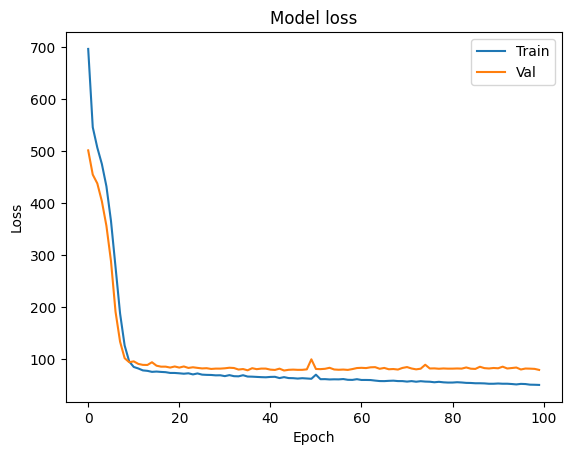

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

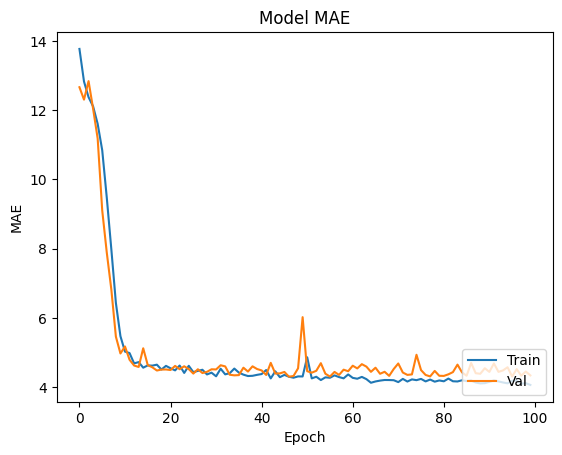

In [19]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [29]:
single_x_test = X_scale[4]
single_y_test = Y[4]
print(single_y_test)
print(single_x_test)

9.0
[1.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         1.         0.64285714
 1.        ]


In [32]:
# actual value is 9
import numpy as np
single_prediction_result = model.predict(np.array([single_x_test]))[0]
single_prediction_result

1/1 [==============================] - 0s 45ms/step


array([7.391806], dtype=float32)

In [33]:
# actual value is 2
single_x_test = X_scale[3]
single_y_test = Y[3]
print(single_y_test)
print(single_x_test)

2.0
[1.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         1.
 0.95238095]


In [34]:
single_prediction_result = model.predict(np.array([single_x_test]))[0]
single_prediction_result

1/1 [==============================] - 0s 13ms/step


array([1.6276339], dtype=float32)